<a href="https://colab.research.google.com/github/jin-seok0724/date/blob/main/Colab_%EC%8B%9C%EC%9E%91%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [10]:
File2 = 'https://raw.githubusercontent.com/jin-seok0724/date/main/Training_12mm.csv'
df = pd.read_csv(File2)
print(df.head())

  Check  N_Wire   D_W  Measured  Force   Initial  Force_Max
0     y       2  12.7  0.016152      0  0.016152         22
1     y       2  12.7  0.015631      2  0.016152         22
2     y       2  12.7  0.015296      4  0.016152         22
3     y       2  12.7  0.014645      6  0.016152         22
4     y       2  12.7  0.014101      8  0.016152         22


In [11]:
print(df.shape)
print(df)

(638, 7)
    Check  N_Wire   D_W  Measured  Force   Initial  Force_Max
0       y       2  12.7  0.016152      0  0.016152         22
1       y       2  12.7  0.015631      2  0.016152         22
2       y       2  12.7  0.015296      4  0.016152         22
3       y       2  12.7  0.014645      6  0.016152         22
4       y       2  12.7  0.014101      8  0.016152         22
..    ...     ...   ...       ...    ...       ...        ...
633     n       6  12.7  0.017986     24  0.021720         66
634     n       6  12.7  0.018880     18  0.021720         66
635     n       6  12.7  0.020254     12  0.021720         66
636     n       6  12.7  0.021040      6  0.021720         66
637     n       6  12.7  0.021860      0  0.021720         66

[638 rows x 7 columns]


In [12]:
filtered_df = df[df['Check'] == 'n']

In [13]:
print(filtered_df.shape)
print(filtered_df)

(242, 7)
    Check  N_Wire   D_W  Measured  Force   Initial  Force_Max
12      n       2  12.7  0.011830     20  0.016152         22
13      n       2  12.7  0.012201     18  0.016152         22
14      n       2  12.7  0.012552     16  0.016152         22
15      n       2  12.7  0.013102     14  0.016152         22
16      n       2  12.7  0.013652     12  0.016152         22
..    ...     ...   ...       ...    ...       ...        ...
633     n       6  12.7  0.017986     24  0.021720         66
634     n       6  12.7  0.018880     18  0.021720         66
635     n       6  12.7  0.020254     12  0.021720         66
636     n       6  12.7  0.021040      6  0.021720         66
637     n       6  12.7  0.021860      0  0.021720         66

[242 rows x 7 columns]


In [52]:
입력 = filtered_df[['Check','N_Wire','D_W','Measured','Initial','Force_Max']]
정답 = filtered_df[['Force']]

In [53]:
print(입력.shape)
print(입력)

(242, 6)
    Check  N_Wire   D_W  Measured   Initial  Force_Max
12      n       2  12.7  0.011830  0.016152         22
13      n       2  12.7  0.012201  0.016152         22
14      n       2  12.7  0.012552  0.016152         22
15      n       2  12.7  0.013102  0.016152         22
16      n       2  12.7  0.013652  0.016152         22
..    ...     ...   ...       ...       ...        ...
633     n       6  12.7  0.017986  0.021720         66
634     n       6  12.7  0.018880  0.021720         66
635     n       6  12.7  0.020254  0.021720         66
636     n       6  12.7  0.021040  0.021720         66
637     n       6  12.7  0.021860  0.021720         66

[242 rows x 6 columns]


In [60]:
입력 ['Check'] = 입력['Check'].map({'n':0})

<ipython-input-60-24730089181b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  입력 ['Check'] = 입력['Check'].map({'n':0})


In [62]:
X = tf.keras.layers.Input(shape=[입력.shape[1]])
Y = tf.keras.layers.Dense(1)(X)
model_2 = tf.keras.models.Model(X,Y)
model_2.compile(optimizer='adam', loss='mse')
history_2 = model_2.fit(입력, 정답, epochs=500)

Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 3711.1213
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3806.7290 
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3463.1924 
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3266.6860  
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3543.6458 
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3615.0686  
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3274.1030 
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3475.7056 
Epoch 9/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3265.0830 
Epoch 10/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3014.2080 
Epoch 11/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2896.3425 
Epoch 12/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3165.0669 
Epoch 13/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2854.0884 
Epoch 14/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3310.1460 
Epoch 15/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 

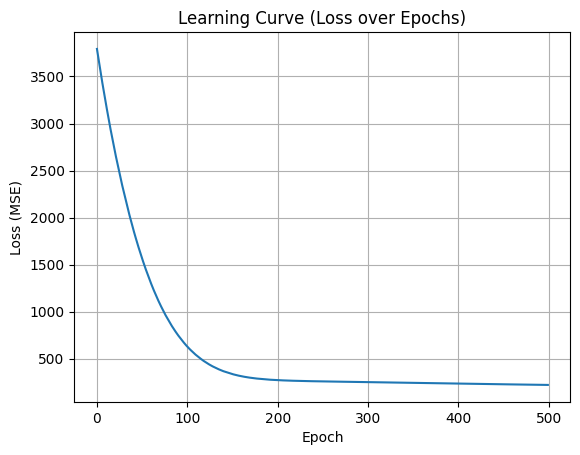

In [65]:
import matplotlib.pyplot as plt
plt.plot(history_2.history['loss'])
plt.title('Learning Curve (Loss over Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.grid(True)
plt.show()

In [64]:
model_3 = tf.keras.Sequential([
tf.keras.layers.Input(shape=[입력.shape[1]]),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(32, activation= 'relu'),
tf.keras.layers.Dense(1)
])

model_3.compile(optimizer='adam', loss= 'mse')
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,561 (10.00 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
X = tf.keras.layers.Input(shape=[입력.shape[1]])
Y = tf.keras.layers.Dense(1)(X)
model_3 = tf.keras.models.Model(X,Y)
model_3.compile(optimizer='adam', loss='mse')
history_3 = model_3.fit(입력, 정답, epochs=500)

Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 858.0054
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 781.8086  
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 780.1723 
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 867.1316 
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 767.0631 
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 705.2127 
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 689.3027  
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 662.1352 
Epoch 9/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 717.6132  
Epoch 10/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 563.5171 
Epoch 11/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 613.2519 
Epoch 12/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 602.1944 
Epoch 13/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 539.9891 
Epoch 14/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 535.7040 
Epoch 15/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - lo